### Imports etc.

In [68]:
import copy
import datetime

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
%matplotlib inline
pd.set_option("display.max_colwidth", -1)

### Load Survey Text Translation to Standardize Responses

In [69]:
TRANSLATIONS = {}
LANGUAGES = ["ar", "bn", "de", "en", "es", "he", "hi", "hu", "ja", "nl", "ro", "ru", "uk", "zh"]
translations_fn = "../data/translation_table.csv"

translation_table = pd.read_csv(translations_fn, sep = ",")
# each row contains a short, universal descriptor for a possible answer along with translations:
# e.g., "fact" as short and "look up a specific fact or to get a quick answer." as English version
for column in translation_table:
    if (column != "short"):
        TRANSLATIONS[column] = dict(zip(translation_table[column], translation_table["short"]))

### Utility Functions

In [70]:
def reformat_dt(s):
    """Set datetime format to YYYY-mm-dd HH:MM:SS."""
    from_pattern = "%m/%d/%Y %H:%M:%S"  
    to_pattern = "%Y-%m-%d %H:%M:%S"
    from_dt = datetime.datetime.strptime(s, from_pattern)
    return from_dt.strftime(to_pattern)
     
def recode_motivation(x, lang):
    """Clean motivation responses.
    
    1. Replaces non-breaking spaces with normal ones
        (happens e.g., in en survey responses)
    2. Removes double spaces
    """
    x = str(x).replace(u'\xa0', u' ')
    for lang_specific, short in TRANSLATIONS[lang].items():
        x = x.replace(lang_specific, short) 
    motivations = x.split(', ')
    reasons = [e if e in TRANSLATIONS[lang].values() else 'other' for e in motivations]
    return '|'.join(set(reasons))
    
def recode_df(d, lang):
    """Standardize and shorten responses."""
    d = copy.deepcopy(d)
    d = d.fillna('no_response')
    d.columns = ['submit_timestamp', 'raw_information_depth', 'raw_prior_knowledge', 'raw_motivation', 'survey_id']
    d['submit_timestamp'] = d['submit_timestamp'].apply(reformat_dt)
    d['information depth'] = d['raw_information_depth'].apply(lambda x: TRANSLATIONS[lang].get(x, 'other'))
    d['prior knowledge'] = d['raw_prior_knowledge'].apply(lambda x: TRANSLATIONS[lang].get(x, 'other'))    
    d['motivation'] = d['raw_motivation'].apply(recode_motivation, args=(lang, ))
    return d

def clean_df(df):
    """Drop duplicates and no responses."""
    df = df[df["survey_id"] != "no_response"]
    df.drop_duplicates(subset="survey_id", inplace=True)
    return df

def get_raw_csv_fn(lang):
    return '../data/main/raw/responses_' + lang + '.csv'

def get_recoded_csv_fn(lang):
    return '../data/main/recoded/responses_' + lang + '_recoded.csv'

def print_summary(df):
    """Print summary of responses for a given project."""
    print("\n\n\n***********************")
    print("** {0}".format(lang))
    print("***********************")
    print("Cleaned Responses: {0}".format(len(df)))
    sns.countplot(x="prior knowledge", data=df)
    plt.show()
    sns.countplot(x="information depth", data=df)
    plt.show()
    print(df['motivation'].value_counts())
    print("***********************")
    print("# 'other' used: {0}".format(len(df[df['motivation'].str.contains("other")])))

### Recode raw survey responses

In [71]:
for lang in LANGUAGES:
    print("recode: {0}".format(lang))
    df = pd.read_csv(get_raw_csv_fn(lang), sep = ',')
    df = recode_df(df, lang)
    df = clean_df(df)
    df.to_csv(get_recoded_csv_fn(lang), sep = ',', index=False)

recode:  ar


/home/flemmerich/anaconda3/lib/python3.6/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


recode:  bn
recode:  de
recode:  en
recode:  es
recode:  he
recode:  hi
recode:  hu
recode:  ja
recode:  nl
recode:  ro
recode:  ru
recode:  uk
recode:  zh


### Fine-Grained Descriptive Stats




***********************
**  ar
***********************
Cleaned Responses:  2348


/home/flemmerich/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


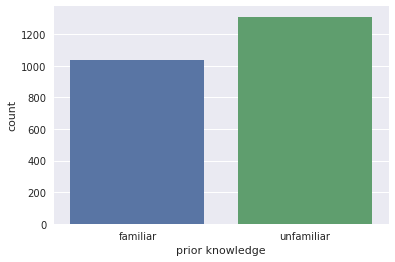

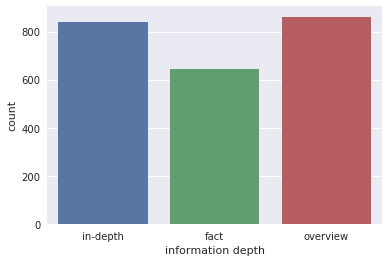

intrinsic_learning                                                                                462
media                                                                                             284
bored/random                                                                                      283
conversation                                                                                      150
current_event                                                                                     133
work/school                                                                                       116
other                                                                                              67
personal_decision                                                                                  61
media|intrinsic_learning                                                                           54
current_event|intrinsic_learning                                                  

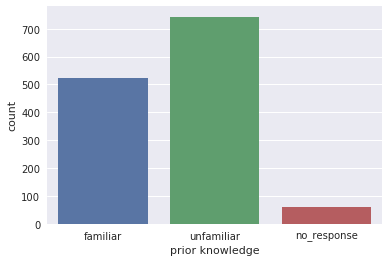

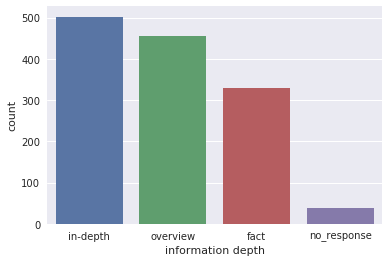

intrinsic_learning                                                                                281
work/school                                                                                       110
conversation                                                                                      103
other                                                                                              95
current_event                                                                                      87
bored/random                                                                                       61
personal_decision                                                                                  60
media                                                                                              45
current_event|intrinsic_learning|media|conversation|work/school|bored/random|personal_decision     39
current_event|intrinsic_learning                                                  

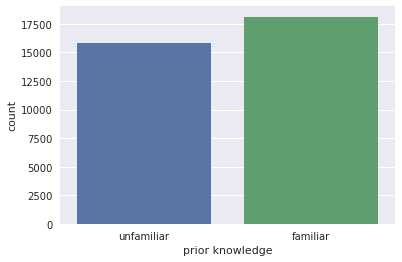

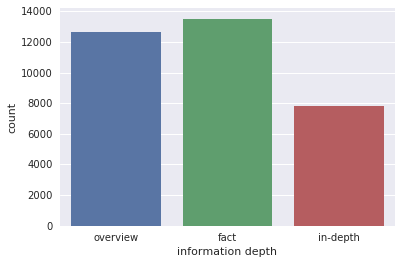

work/school                                                                                 5628
intrinsic_learning                                                                          4627
media                                                                                       4002
conversation                                                                                2986
bored/random                                                                                2917
other                                                                                       1688
current_event                                                                               1271
personal_decision                                                                           1048
work/school|intrinsic_learning                                                               890
intrinsic_learning|bored/random                                                              677
media|intrinsic_learning      

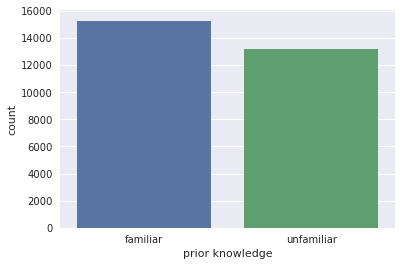

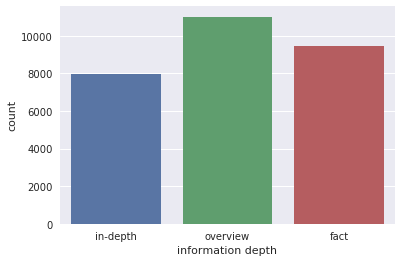

media                                                                   5264
other                                                                   3913
intrinsic_learning                                                      3689
bored/random                                                            3368
conversation                                                            2557
work/school                                                             1989
other|intrinsic_learning                                                 715
media|bored/random                                                       632
media|intrinsic_learning                                                 456
intrinsic_learning|bored/random                                          450
media|other                                                              444
media|other|intrinsic_learning                                           318
other|bored/random                                                       311

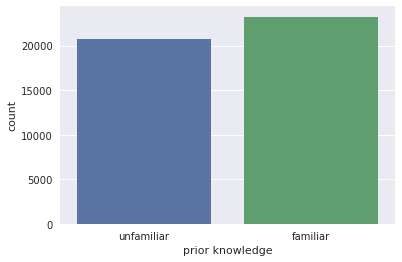

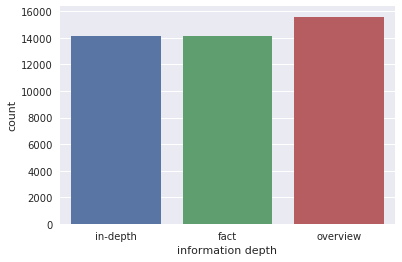

work/school                                                                                       9230
intrinsic_learning                                                                                6155
bored/random                                                                                      3668
media                                                                                             3587
conversation                                                                                      3054
current_event                                                                                     1852
other                                                                                             1701
work/school|intrinsic_learning                                                                    1385
personal_decision                                                                                  775
intrinsic_learning|bored/random                                          

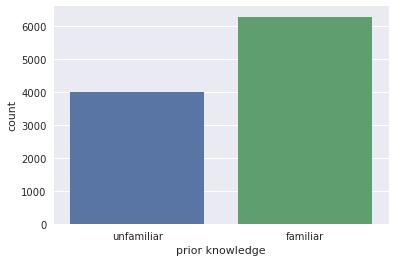

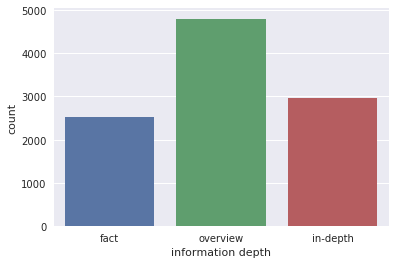

intrinsic_learning                                                                        1420
media                                                                                     1283
bored/random                                                                              1146
conversation                                                                              1108
work/school                                                                                927
other                                                                                      672
current_event                                                                              329
personal_decision                                                                          295
intrinsic_learning|bored/random                                                            227
work/school|intrinsic_learning                                                             161
media|intrinsic_learning                          

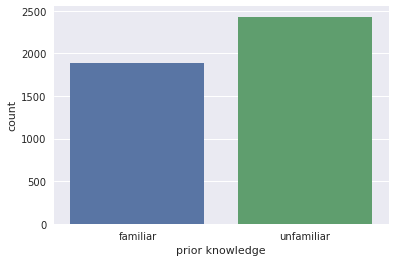

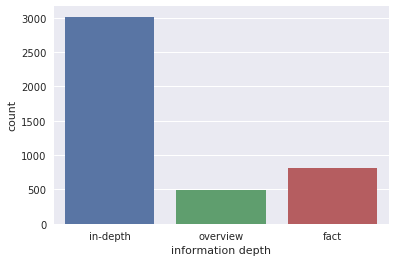

intrinsic_learning                                                                                      1439
work/school                                                                                              535
conversation                                                                                             523
current_event                                                                                            340
personal_decision                                                                                        161
bored/random                                                                                             136
media                                                                                                    119
other                                                                                                    107
work/school|intrinsic_learning                                                                            83
current_event|intri

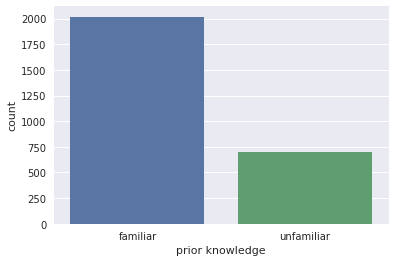

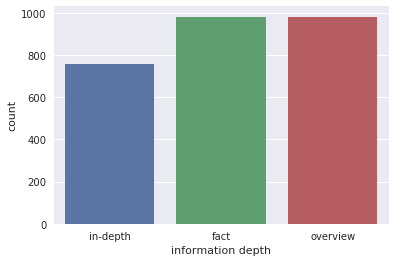

intrinsic_learning                                                                                387
media                                                                                             238
bored/random                                                                                      204
conversation                                                                                      200
work/school                                                                                       189
personal_decision                                                                                 178
current_event                                                                                     112
other                                                                                              71
intrinsic_learning|bored/random                                                                    66
intrinsic_learning|personal_decision                                              

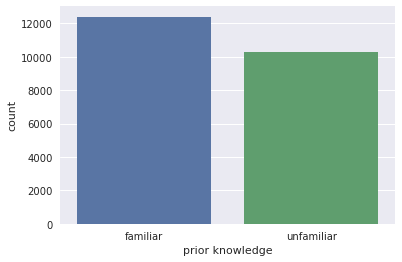

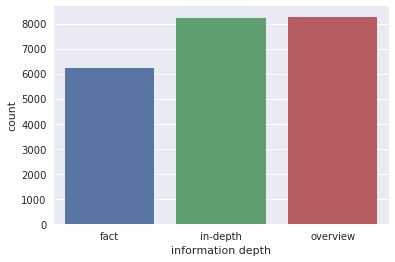

media                                                                                       3613
bored/random                                                                                3562
intrinsic_learning                                                                          3090
conversation                                                                                1858
current_event                                                                               1681
work/school                                                                                 1533
personal_decision                                                                           1050
other                                                                                        840
work/school|intrinsic_learning                                                               431
intrinsic_learning|bored/random                                                              396
media|bored/random            

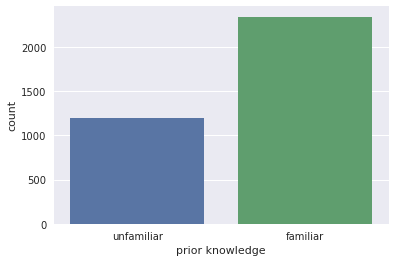

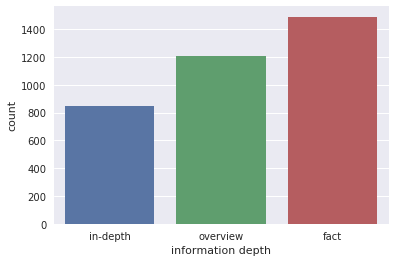

work/school                                                                                             608
media                                                                                                   545
conversation                                                                                            404
intrinsic_learning                                                                                      376
other                                                                                                   291
bored/random                                                                                            264
current_event                                                                                           144
personal_decision                                                                                        92
work/school|intrinsic_learning                                                                           61
intrinsic_learning|bored/ran

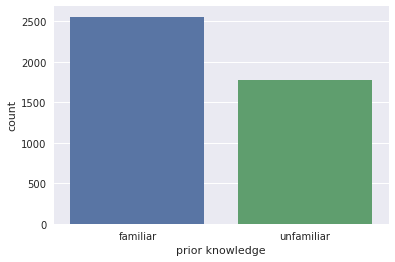

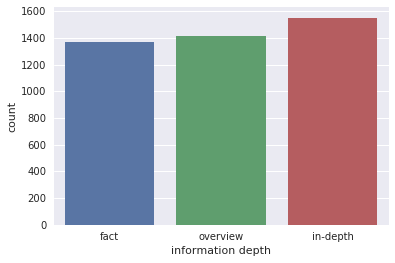

intrinsic_learning                                                                          948
work/school                                                                                 622
conversation                                                                                418
media                                                                                       370
bored/random                                                                                220
current_event                                                                               216
other                                                                                       154
work/school|intrinsic_learning                                                              141
personal_decision                                                                           105
current_event|intrinsic_learning                                                             77
conversation|intrinsic_learning         

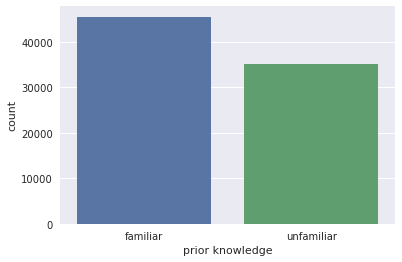

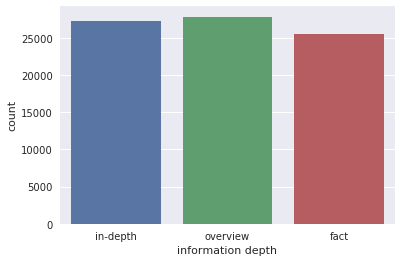

intrinsic_learning                                                                         17459
media                                                                                      12560
bored/random                                                                                6424
conversation                                                                                6283
work/school                                                                                 4578
current_event                                                                               4428
personal_decision                                                                           2613
media|intrinsic_learning                                                                    2558
other                                                                                       1940
intrinsic_learning|bored/random                                                             1543
conversation|intrinsic_learnin

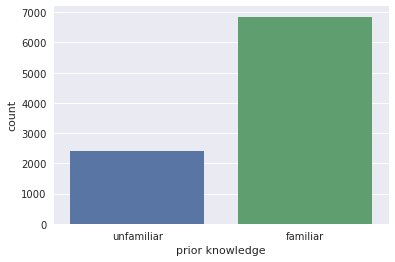

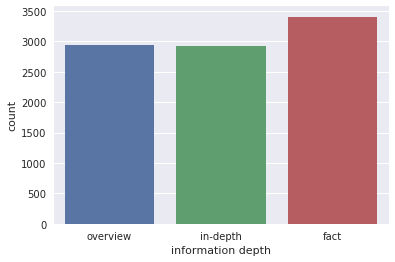

intrinsic_learning                                                                                      1572
work/school                                                                                             1126
media                                                                                                    885
conversation                                                                                             773
current_event                                                                                            711
bored/random                                                                                             442
personal_decision                                                                                        397
current_event|intrinsic_learning                                                                         236
work/school|intrinsic_learning                                                                           202
intrinsic_learning|

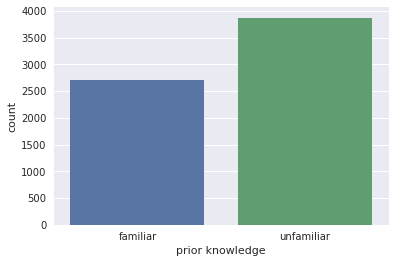

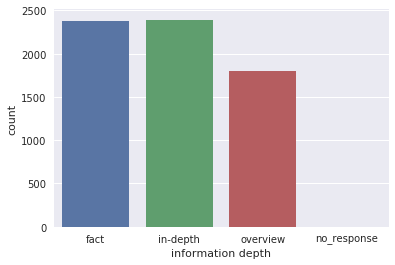

media                                                                                             860
intrinsic_learning                                                                                823
bored/random                                                                                      685
work/school                                                                                       497
conversation                                                                                      420
current_event                                                                                     303
work/school|intrinsic_learning                                                                    170
media|bored/random                                                                                156
other                                                                                             152
intrinsic_learning|bored/random                                                   

In [6]:
for lang in LANGUAGES:
    df = pd.read_csv(get_recoded_csv_fn(lang), sep = ',')
    print_summary(df)

### Which "other" answers have been given

In [8]:
max_print_per_lang = -1  # -1 == all
langs_to_check = LANGUAGES  # LANGUAGES for all, ["en"] for just English
for lang in langs_to_check:
    df = pd.read_csv(get_recoded_csv_fn(lang), sep = ',')
    print("\n\n\n***********************")
    print("** ", lang)
    print("***********************")
    num_printed = 0
    for i, r in df[df['motivation'].str.contains('other')].iterrows():
        print("**", r['raw_motivation'])
        num_printed += 1
        if num_printed == max_print_per_lang:
            break

### Summary Stats Across Languages

In [72]:
def langresults_to_series (lang, df):
    #inf_gain = df["information depth"].value_counts()
    #all_counts = all_counts.append(df["prior knowledge"].value_counts())
    all_counts = pd.Series()
    
    inf_need = ["in-depth", "overview", "fact"]
    for m in inf_need:
        all_counts = all_counts.append(pd.Series(sum(df["information depth"] == m), ["in_" + m]))
    prior = ["unfamiliar", "familiar"]
    for m in prior:
        all_counts = all_counts.append(pd.Series(sum(df["prior knowledge"] == m), ["pk_" + m]))
    motivations = ["current_event", "media", "bored/random", "intrinsic_learning", "conversation", "personal_decision", "other", "work/school"]
    for m in motivations:
        all_counts = all_counts.append(pd.Series(sum(df.motivation.str.contains(m)), ["m_" + m]))
    all_counts = all_counts.append(pd.Series(len(df), ["response_count"]))
    
    return pd.to_numeric(all_counts)

In [78]:
all_series = []
for lang in LANGUAGES:
    df = pd.read_csv(get_recoded_csv_fn(lang), sep = ',')
    s = langresults_to_series(lang, df)
    all_series.append(s)

In [86]:
# raw counts
df = pd.concat(all_series, axis=0, keys=LANGUAGES).unstack()
df.to_csv("/home/flemmerich/wikimotifs2/results/biased_results_counts.csv")
print(df)

,in_in-depth,in_overview,in_fact,pk_unfamiliar,pk_familiar,m_current_event,m_media,m_bored/random,m_intrinsic_learning,m_conversation,m_personal_decision,m_other,m_work/school,response_count
ar,840,862,646,1311,1037,516,671,612,1050,417,290,118,350,2348
bn,502,456,330,743,522,366,238,181,668,350,285,124,311,1327
de,7808,12646,13509,15831,18132,3995,7926,6777,10876,6434,2799,2622,8615,33963
en,7968,11014,9467,13170,15279,3865,9194,6885,8210,5286,2768,2168,3385,28449
es,14178,15599,14165,20710,23232,6884,8554,8130,15555,8193,3393,3162,14502,43942
he,2955,4803,2527,3999,6286,1330,2637,2493,3300,2473,829,966,1613,10285
hi,3014,485,817,2430,1886,858,391,349,2211,990,512,169,982,4316
hu,758,978,981,699,2018,572,707,607,1168,640,630,134,476,2717
ja,8208,8272,6217,10298,12399,3512,5836,5814,6045,3357,2447,1109,2693,22697
nl,847,1208,1490,1200,2345,382,893,604,819,697,234,401,832,3545


In [88]:
# proportions
c = df.pop("response_count")
df = df.div(c, axis=0)
df["response_count"] = c
df.to_csv("/home/flemmerich/wikimotifs2/results/biased_results_proportions.csv")
with pd.option_context('display.float_format', "{:.3f}"):
    print(df)

,in_in-depth,in_overview,in_fact,pk_unfamiliar,pk_familiar,m_current_event,m_media,m_bored/random,m_intrinsic_learning,m_conversation,m_personal_decision,m_other,m_work/school,response_count
ar,0.357751,0.367121,0.275128,0.558348,0.441652,0.219761,0.285775,0.260647,0.447189,0.177598,0.123509,0.050256,0.149063,2348
bn,0.378297,0.343632,0.248681,0.559910,0.393369,0.275810,0.179352,0.136398,0.503391,0.263753,0.214770,0.093444,0.234363,1327
de,0.229897,0.372346,0.397756,0.466125,0.533875,0.117628,0.233372,0.199541,0.320231,0.189441,0.082413,0.077202,0.253658,33963
en,0.280080,0.387149,0.332771,0.462934,0.537066,0.135857,0.323175,0.242012,0.288587,0.185806,0.097297,0.076207,0.118985,28449
es,0.322653,0.354991,0.322357,0.471303,0.528697,0.156661,0.194666,0.185017,0.353989,0.186450,0.077215,0.071958,0.330026,43942
he,0.287312,0.466991,0.245698,0.388819,0.611181,0.129315,0.256393,0.242392,0.320856,0.240447,0.080603,0.093923,0.156830,10285
hi,0.698332,0.112373,0.189296,0.563021,0.436979,0.198795,0.090593,0.080862,0.512280,0.229379,0.118628,0.039157,0.227525,4316
hu,0.278984,0.359956,0.361060,0.257269,0.742731,0.210526,0.260213,0.223408,0.429886,0.235554,0.231873,0.049319,0.175193,2717
ja,0.361634,0.364453,0.273913,0.453716,0.546284,0.154734,0.257126,0.256157,0.266335,0.147905,0.107812,0.048861,0.118650,22697
nl,0.238928,0.340762,0.420310,0.338505,0.661495,0.107757,0.251904,0.170381,0.231030,0.196615,0.066008,0.113117,0.234697,3545


### Raw Examples

In [82]:
lang = "en"
df = pd.read_csv(get_raw_csv_fn(lang), sep = ',')
print(translation_table[lang])

In [ ]:
# print random response
print(df.loc[np.random.randint(0, len(df))])